In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import HTML,Image

In [54]:
%matplotlib inline

In [55]:

def random_walk(G,node_id,len_walk=5):
    walk=[node_id]
    curr_n = node_id
    for i in range(len_walk):
        nodes = [n for n in list(nx.neighbors(G,curr_n)) if n not in walk]
        if len(nodes) == 0:
            break
        p = 1./len(nodes)
        curr_n = np.random.choice(nodes,1,[p]*len(nodes)).item()
        walk.append(curr_n)
    return walk

def color_node(G,walk):
    color = []
    pal=sns.color_palette("Reds", len(walk))
    walk_color = {walk[i]:pal[i] for i in range(len(walk))}
    for n in G.nodes():
        if n in walk_color:
            color.append(walk_color[n])
        else:
            color.append("#95a5a6")
    return color
    

/home/jacques/anaconda3/envs/gnn_env2/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jacques/anaconda3/envs/gnn_env2/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


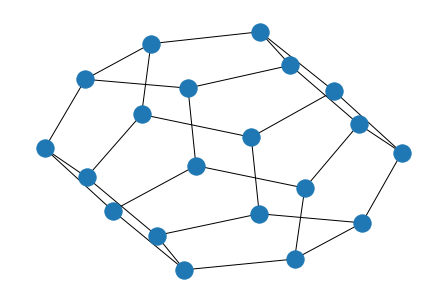

In [56]:
G = nx.dodecahedral_graph()
walk =random_walk(G,1,10)
nx.draw(G)

In [57]:
def draw_walk(G,walk,pos=None,ax=None):

    labels = dict(zip([(walk[i-1],walk[i])for i in range(1,len(walk))],range(1,len(walk)+1)))
    
    if not ax:
        fig,ax = plt.subplots(figsize=(15,10))
    if not pos:
        pos = nx.spring_layout(G,seed=32)
        
    nx.draw_networkx_nodes(G,pos,node_color=color_node(G,walk),node_size=500,ax=ax)
    nx.draw_networkx_edges(G,pos,edge_color="black",edgelist=[ed for ed in list(G.edges()) if (not ed in labels) and (not (ed[1],ed[0]) in labels)],ax=ax)
    nx.draw_networkx_edges(G,pos,edge_color="red",edgelist=list(labels.keys()),ax=ax,style="dashed")
    nx.draw_networkx_edge_labels(G,pos,labels,font_size=12,font_color="red",font_family='Arial',ax=ax)
    nx.draw_networkx_edges(nx.subgraph(G,list(labels.keys())),pos,edge_color="red",ax=ax)
    #nx.draw_networkx_labels(G,pos,ax=ax)
    ax.axis("off")
    if ax:
        return ax
    return fig,ax

<AxesSubplot:>

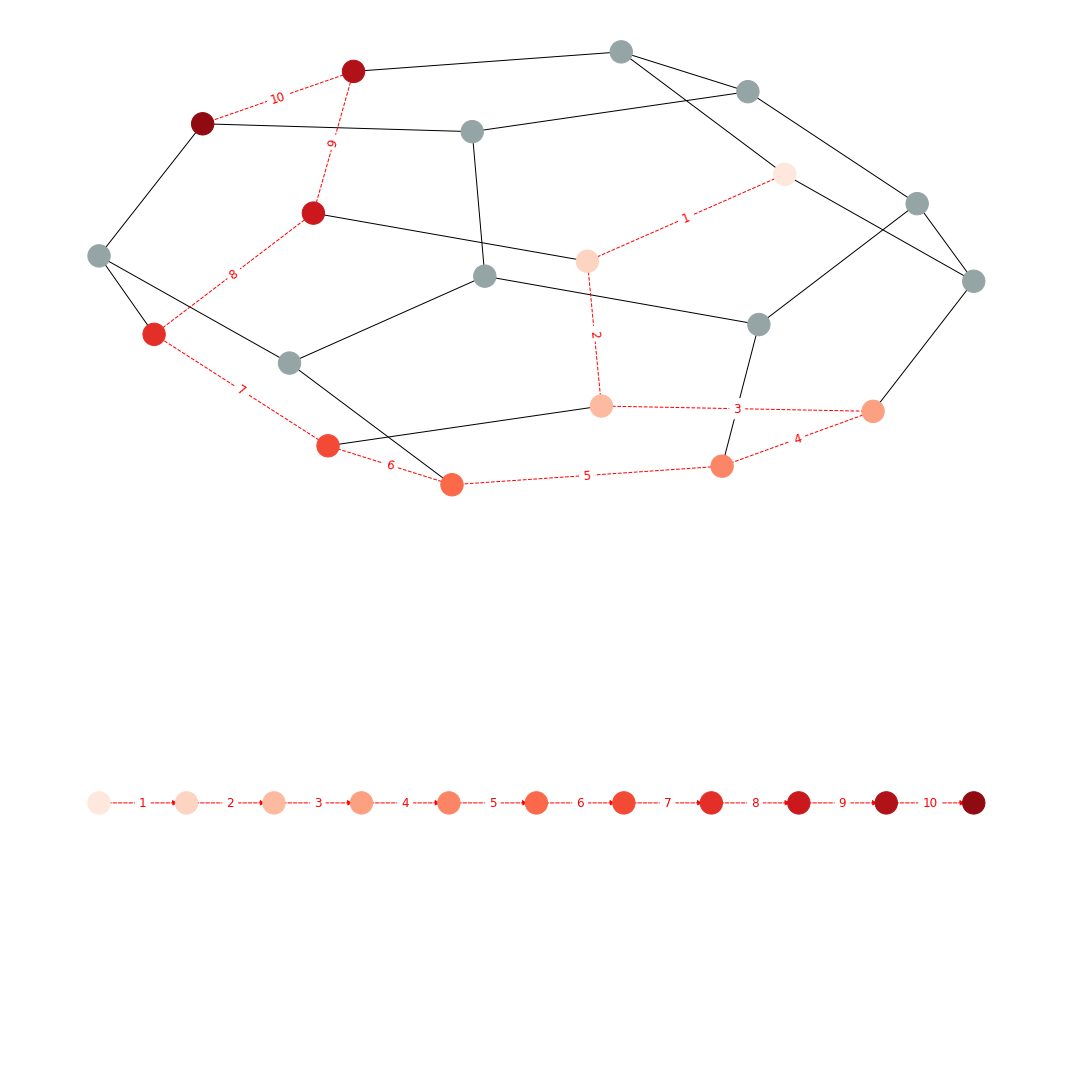

In [58]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,15))

draw_walk(G,walk,ax=ax1)

edges = [(walk[i-1],walk[i])for i in range(1,len(walk))]
H= nx.DiGraph()
H.add_edges_from(edges)
draw_walk(H,walk,pos={node:[ix*10,0] for ix,node in enumerate(walk)},ax=ax2)

/home/jacques/anaconda3/envs/gnn_env2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


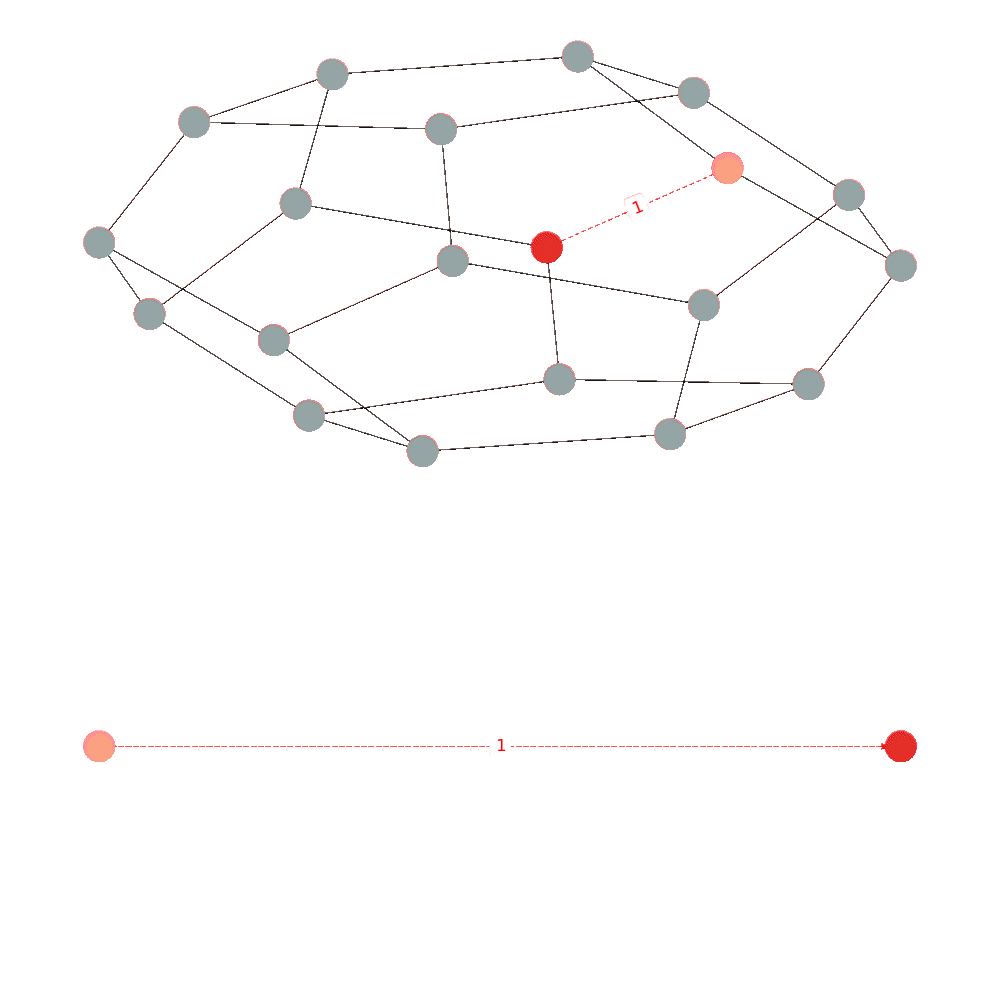

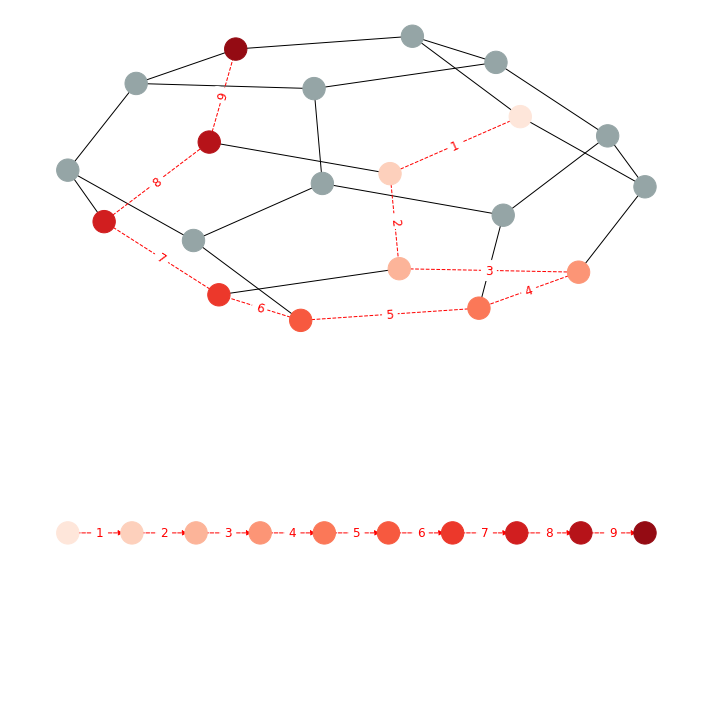

In [79]:
from matplotlib import pyplot as plt, animation
import networkx as nx
import random

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig,(ax,ax2) = plt.subplots(nrows=2,figsize=(10,10))
i = 2
draw_walk(G,walk[:i],ax=ax)

edges = [(walk[k-1],walk[k])for k in range(1,i)]
H= nx.DiGraph()
H.add_edges_from(edges)
draw_walk(H,walk[:i],pos={node:[ix*10,0] for ix,node in enumerate(walk[:i])},ax=ax2)


def animate(frame):
    if frame >2:
        ax.cla()
        ax2.cla()
        draw_walk(G,walk[:frame],ax=ax)
        
        edges = [(walk[i-1],walk[i])for i in range(1,frame)]
        H= nx.DiGraph()
        H.add_edges_from(edges)
        draw_walk(H,walk[:frame],pos={node:[ix*10,0] for ix,node in enumerate(walk[:frame])},ax=ax2)

ani = animation.FuncAnimation(fig, animate, frames=len(walk), interval=1000, repeat=True)
ani.save("randomwalk.gif",dpi=100)
Image("randomwalk.gif")